In [7]:
import scvelo as scv
adata = scv.read("Pan.h5ad")
adata

AnnData object with n_obs × n_vars = 1006 × 33694
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters'
    var: 'features', 'ambiguous_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

Filtered out 27711 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


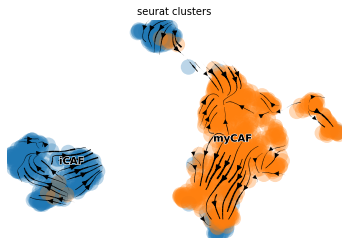

In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters")

saving figure to file ./figures/scvelo_mycaf-icaf.png


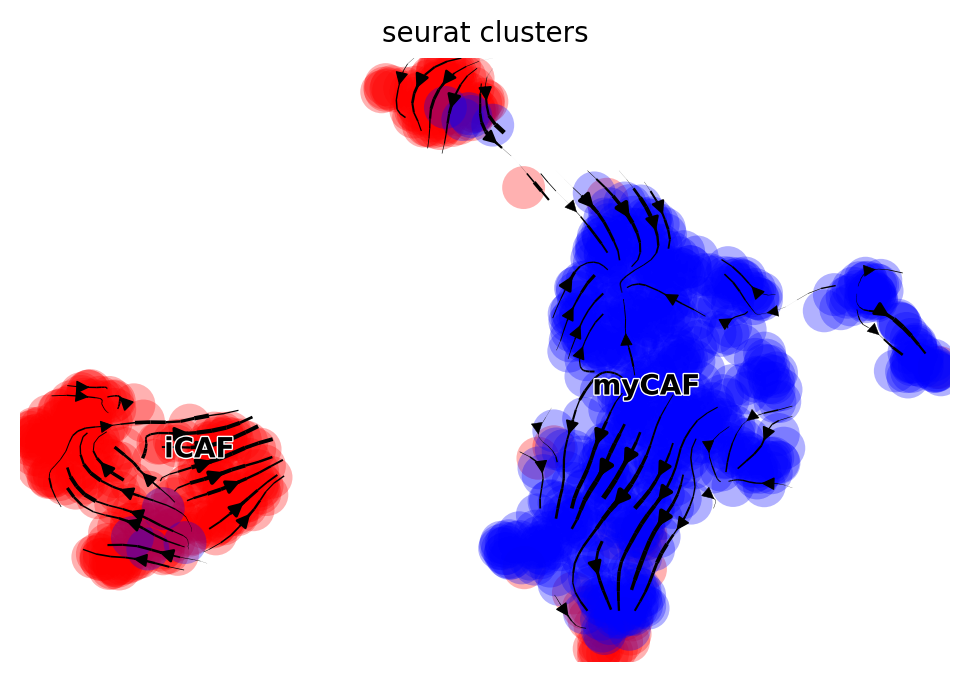

In [10]:
ident_colours = ["red", "blue"]
adata.uns['seurat_clusters_colors']=ident_colours
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters", dpi = 200, save = "mycaf-icaf.png")

saving figure to file ./figures/scvelo_icaf-mycaf.pseudotime.png


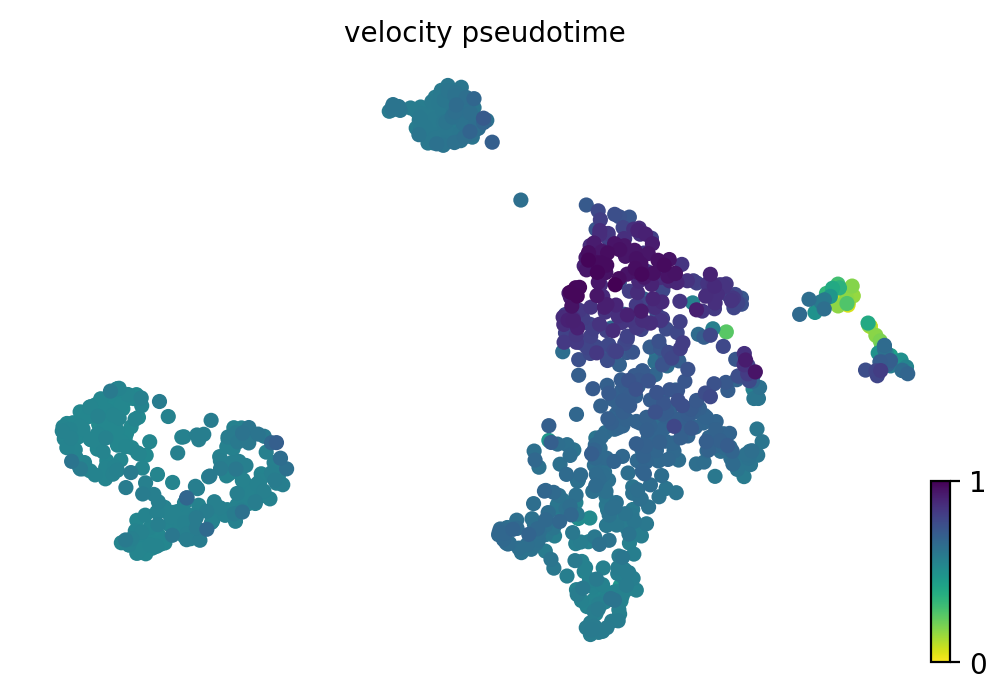

In [8]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color="velocity_pseudotime", dpi = 200, save = "icaf-mycaf.pseudotime.png")

In [ ]:
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color="latent_time", color_map="gnuplot")

In [ ]:
top_genes = adata.var["fit_likelihood"].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby="latent_time", col_color="seurat_clusters", n_convolve=100)